<a href="https://colab.research.google.com/github/runtorain/Dog-Breeds/blob/main/DogBreedTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Oct 18 14:04:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##1. Collection Data

###1.1 Get from Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/dog/archive.zip" -d "/content/dog" 

Streaming output truncated to the last 5000 lines.
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: /content/dog/images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: /conte

In [4]:
import os
def walk_trough_dir(dir_path):

  """
  Walk througrh Dir path and return its content 
  """
  for dirpath , dirnames, filename in os.walk(dir_path):
    print(f"There are {len(dirnames)} Directories and {len(filename)} image in {dirpath}. ")

In [5]:
image_path = "/content/dog/images/Images"

In [6]:
walk_trough_dir(image_path)

There are 120 Directories and 0 image in /content/dog/images/Images. 
There are 0 Directories and 179 image in /content/dog/images/Images/n02093859-Kerry_blue_terrier. 
There are 0 Directories and 157 image in /content/dog/images/Images/n02095314-wire-haired_fox_terrier. 
There are 0 Directories and 152 image in /content/dog/images/Images/n02101388-Brittany_spaniel. 
There are 0 Directories and 167 image in /content/dog/images/Images/n02099849-Chesapeake_Bay_retriever. 
There are 0 Directories and 160 image in /content/dog/images/Images/n02092339-Weimaraner. 
There are 0 Directories and 186 image in /content/dog/images/Images/n02098413-Lhasa. 
There are 0 Directories and 171 image in /content/dog/images/Images/n02099712-Labrador_retriever. 
There are 0 Directories and 210 image in /content/dog/images/Images/n02111129-Leonberg. 
There are 0 Directories and 197 image in /content/dog/images/Images/n02096177-cairn. 
There are 0 Directories and 202 image in /content/dog/images/Images/n02108

### 1.2 Visulization data

In [7]:
#Create function for reding mark ractagle 
import xml.etree.ElementTree as ET
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [8]:
box = extract_info_from_xml('/content/dog/annotations/Annotation/n02088238-basset/n02088238_10870')
box

{'bboxes': [{'class': 'basset',
   'xmin': 268,
   'ymin': 13,
   'xmax': 358,
   'ymax': 194},
  {'class': 'basset', 'xmin': 0, 'ymin': 57, 'xmax': 275, 'ymax': 208}],
 'filename': 'n02088238_10870',
 'image_size': (500, 318, 3)}

In [9]:
# Reading rectangle from xml file 
def read_rectangel(anotation_path):
  """
  Input : anotation file path 
  OUtput : Start point stop point
  """
  box = extract_info_from_xml(anotation_path)
  list_rectangle = []
  for i in range(len(box["bboxes"])):
    x1 = box["bboxes"][i]['xmin']
    y1 = box["bboxes"][i]['ymin']
    x2 = box["bboxes"][i]['xmax']
    y2 = box["bboxes"][i]['ymax']
    list_rectangle.append([x1,y1,x2,y2])

  return list_rectangle

In [10]:
list_rec = read_rectangel('/content/dog/annotations/Annotation/n02088238-basset/n02088238_10870')
list_rec

[[268, 13, 358, 194], [0, 57, 275, 208]]

In [11]:
# extract anotation path from image path 

def anotation_convert_path(image_path):
  """
  Input : image path 
  OUtput : anotation path 
  """
  path = "/content/dog/annotations/Annotation/" +  image_path[27:]
  path = path[:-4]
  
  return path

In [12]:
temp = anotation_convert_path('/content/dog/images/Images/n02088238-basset/n02088238_10870.jpg')
temp

'/content/dog/annotations/Annotation/n02088238-basset/n02088238_10870'

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow

def picture_with_rec(picture_path):
  """ 
  Input : Pictuer path 
  Output : Picture with rectangle 
  """
  #img = Image.open(picture_path)

  
  anotation_temp_path = anotation_convert_path(picture_path)
  list_ractangle = read_rectangel(anotation_temp_path)
  print(list_ractangle)

  img = cv.imread(picture_path)

  for i in range(len(list_ractangle)):
    x , y , xx, yy = list_ractangle[i]
    #Write ratangel 
    img = cv.rectangle(img,(x,y),(xx,yy),(0,255,0),3)

  cv2_imshow(img)
  x, y, xx, yy = 0,0,0,0

  # Create figure and axes
  #fig, ax = plt.subplots()

  # Display the image
  #ax.imshow(img)

  # Create a Rectangle patch
  #rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  #ax.add_patch(rect)

  #plt.show()

[[268, 13, 358, 194], [0, 57, 275, 208]]


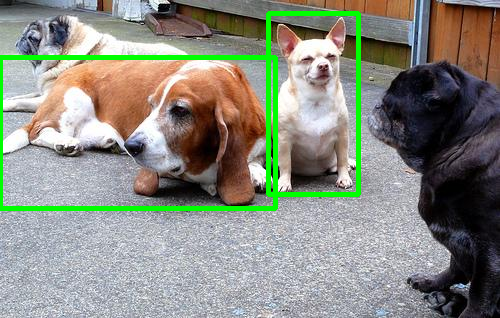

In [14]:
picture_with_rec('/content/dog/images/Images/n02088238-basset/n02088238_10870.jpg')

[[31, 110, 197, 333], [183, 148, 394, 332]]


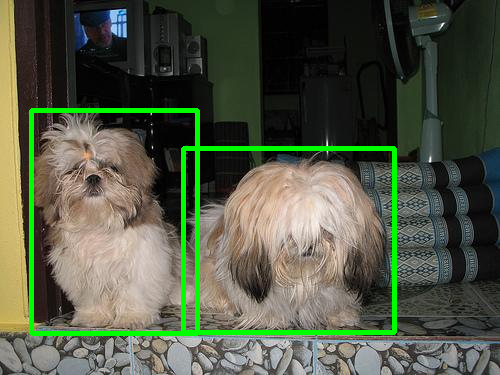

In [15]:
picture_with_rec('/content/dog/images/Images/n02086240-Shih-Tzu/n02086240_10785.jpg')

In [19]:
import os
def List_file_name(dir_path):

  """
  Walk througrh Dir path and return its content 
  """
  for dirpath , dirnames, filename in os.walk(dir_path):
     if (filename.endswith(".png") or filename.endswith(".jpg")\
        or filename.endswith(".jpeg")):
        # display
        print(filename)

In [20]:
List_file_name('/content/dog/images/Images')

AttributeError: ignored

In [21]:
from pathlib import Path

basepath = Path('/content/dog/images/Images')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        print(item.name)

In [22]:
import os

# List all files in a directory using os.listdir
basepath = '/content/dog/images/Images'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        print(entry)

In [23]:
entry

'n02102480-Sussex_spaniel'